In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn.model_selection import train_test_split

In [2]:
n, m = 128, 128

In [3]:
def get_data(data_path):
    data_images=[]
    data_labels=[]
    data_filenames = []
    for i in os.listdir(data_path):
        print(i)
        full_path=os.path.join(data_path+i)
        if(os.path.isdir(full_path)):
            for image_file in os.listdir(full_path):
                try:
                    image = cv2.imread(full_path + "/" + image_file) 
                    image = cv2.resize(image, (n, m)) 
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
                    data_images.append(image)
                    data_labels.append(i)
                    data_filenames.append(image_file)
                except:
                    print("error image: ", image_file)
    return data_images, data_labels, data_filenames

In [4]:
data_path = "C:/Users/mmlit/neuron_net/lab1/ArTaxOr/"

In [5]:
Images, Labels, Filenames = get_data(data_path)

Images = np.array(Images) 
Labels = np.array(Labels)
Filenames = np.array(Filenames)

Araneae
Coleoptera
Diptera
Hemiptera
Hymenoptera
Lepidoptera
Odonata


In [6]:
print("Shape of Images:", Images.shape)
print("Shape of Labels:", Labels.shape)
print("Shape of Filenames:", Filenames.shape)

Shape of Images: (15376, 128, 128, 3)
Shape of Labels: (15376,)
Shape of Filenames: (15376,)


In [7]:
def show_img(Images, Labels):
    f, ax = plt.subplots(5, 5)
    f.subplots_adjust(0, 0, 3, 3)
    for i in range(0, 5):
        for j in range(0, 5):
            rnd_number = randint(0, len(Images))
            ax[i, j].imshow(Images[rnd_number])
            ax[i, j].set_title(Labels[rnd_number])
            ax[i, j].axis('off')
    plt.show()

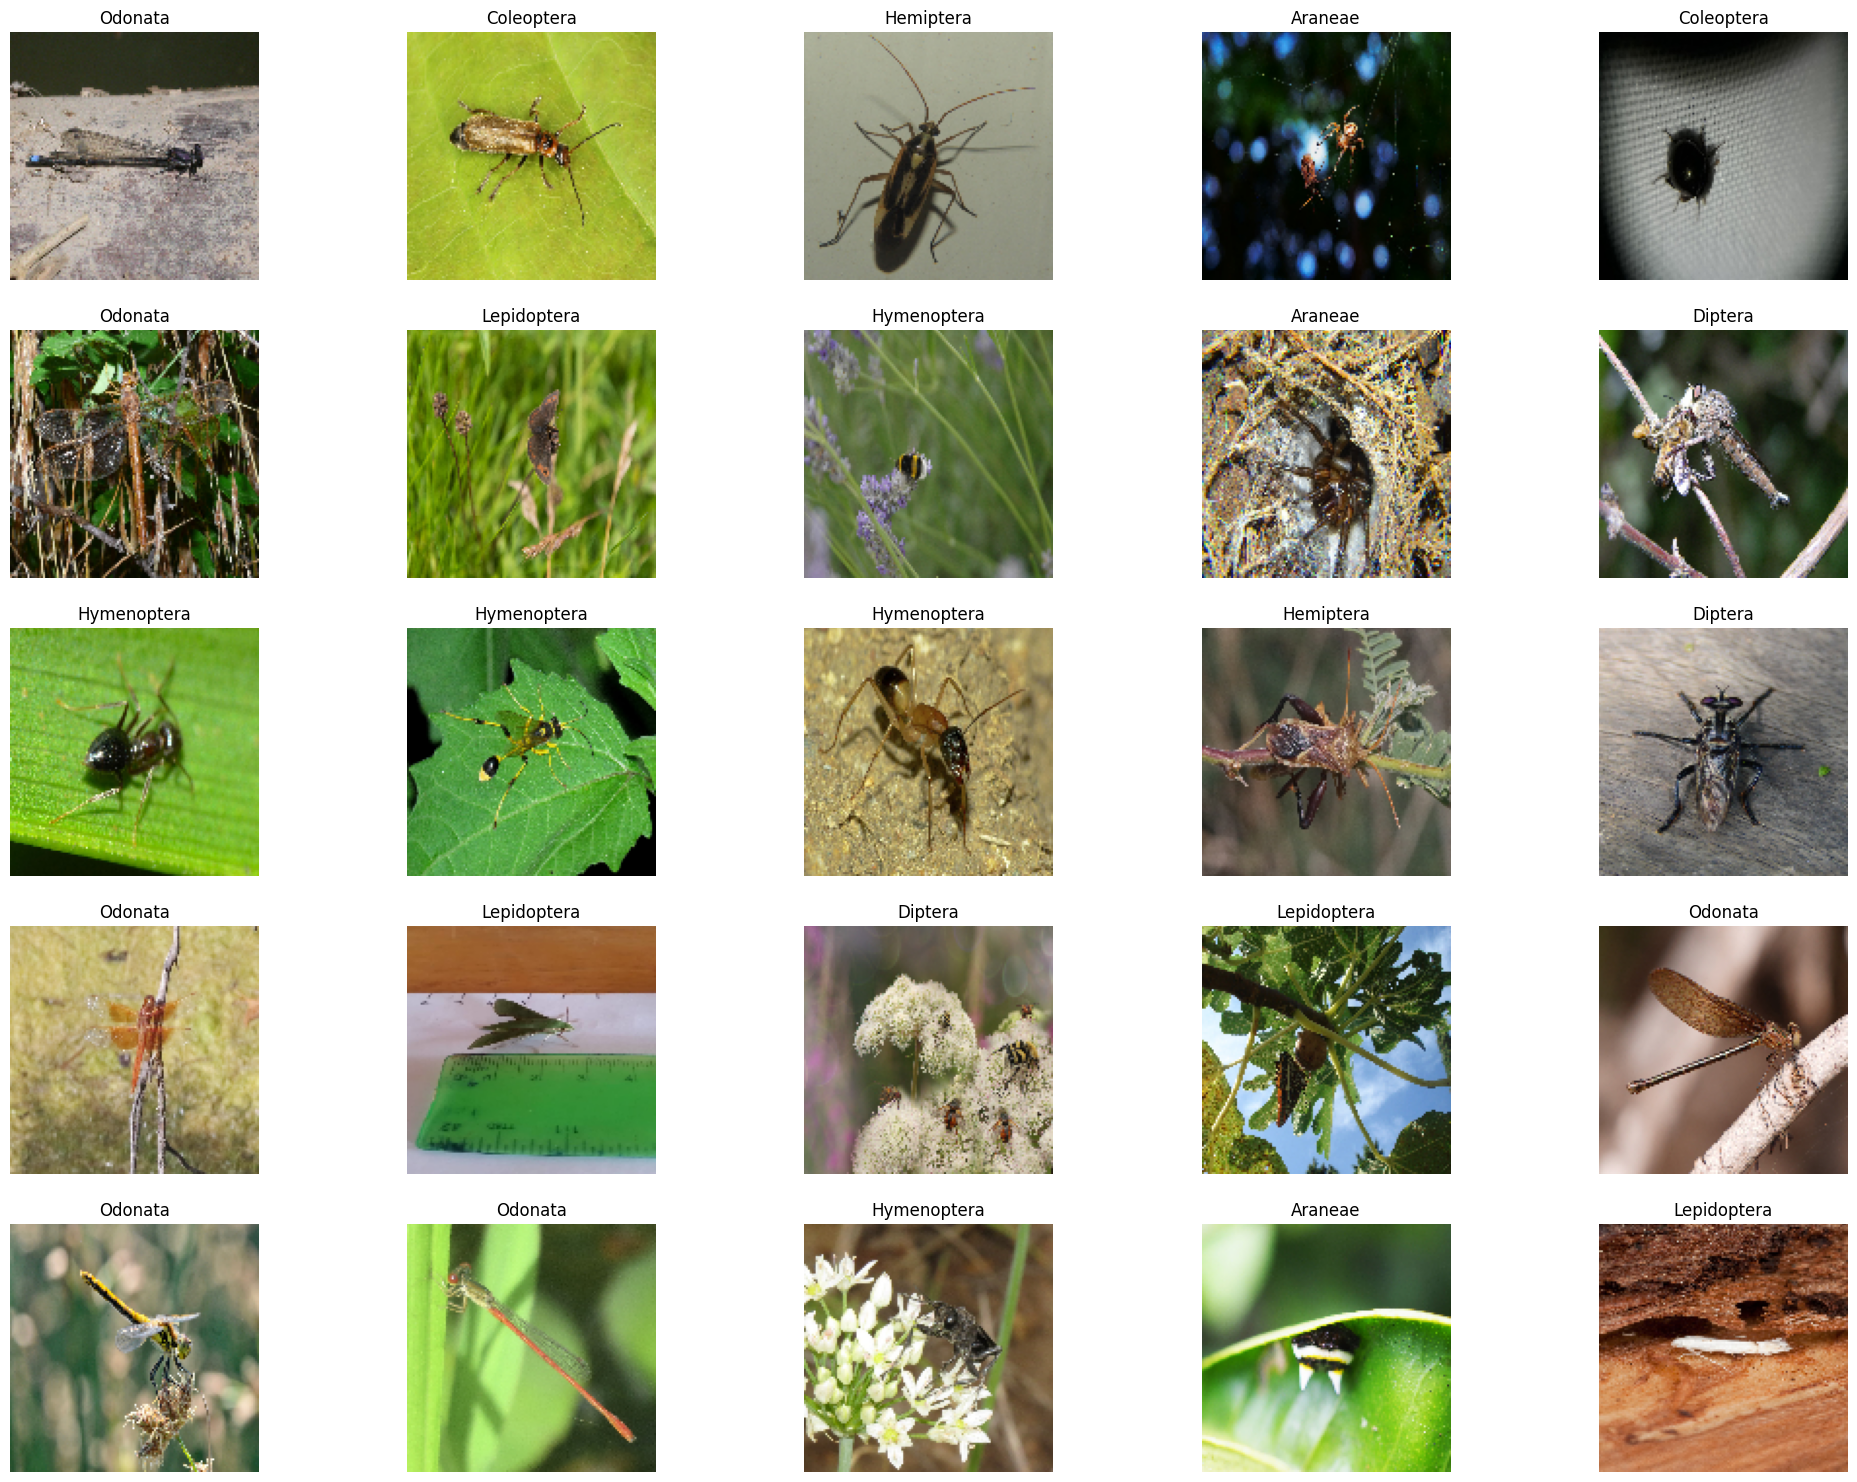

In [8]:
show_img(Images, Labels)

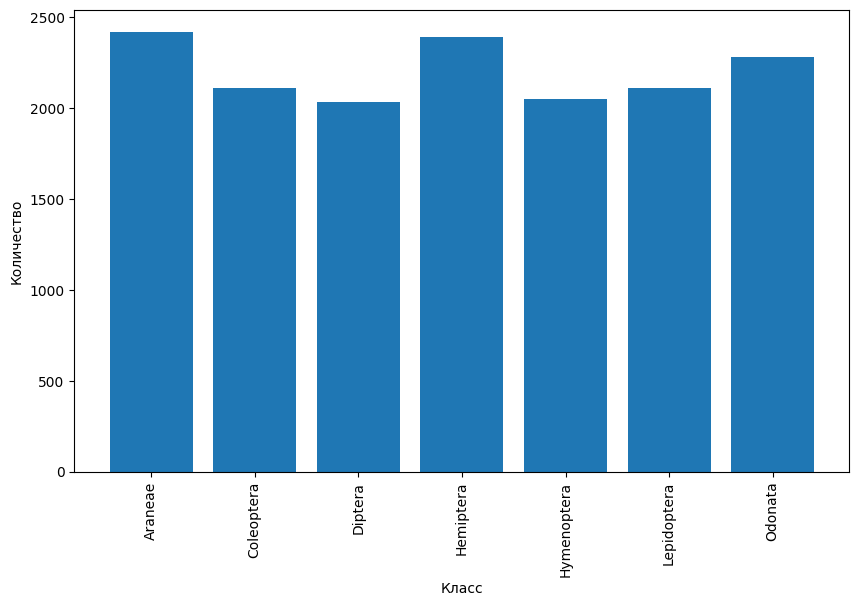

In [6]:
# Преобразование числовых меток в текстовые описания
label_names, label_counts = np.unique(Labels, return_counts=True)

# Построение столбчатой диаграммы с текстовыми метками
plt.figure(figsize=(10, 6))
plt.bar(label_names, label_counts)
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=90)  # Поворот подписей меток для лучшей читаемости
plt.show()

In [9]:
x_train, x_test, y_train, y_test, file_train, file_test = train_test_split(Images, Labels, Filenames, test_size=0.1, random_state=8462)

In [10]:
new_data_path = "C:/Users/mmlit/neuron_net/lab1/ArTaxOr_128x128/"

In [11]:
for i in range(0, len(x_train)):
    filename = file_train[i]
    os.chdir(new_data_path + "train/" + y_train[i] + "/")
    cv2.imwrite(filename , cv2.cvtColor(x_train[i], cv2.COLOR_RGB2BGR))

In [12]:
for i in range(0, len(x_test)):
    filename = file_test[i]
    os.chdir(new_data_path + "test/" + y_test[i] + "/")
    cv2.imwrite(filename , cv2.cvtColor(x_test[i], cv2.COLOR_RGB2BGR))